# Medidas de precisión y selección de modelos

por Mónica Tatiana Gutierrez Ballen

version 1.0, Agosto 2021

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

## Métricas de evaluación para problemas de regresión

### R Cuadrado/R cuadrado ajustado

El cuadrado de R mide cuánta variabilidad de la variable dependiente puede explicar el modelo. Es el cuadrado del coeficiente de correlación (R) y por eso se llama R cuadrado.

$$ R^2 = 1 - \frac{SS_{Regression}}{SS_{Total}} = 1 - \frac{\sum_i (y_i-\hat{y_i})^2}{\sum_i (y_i-\bar{y_i})^2}$$

El cuadrado R se calcula mediante la suma del cuadrado del error de predicción dividido por la suma total del cuadrado que sustituye la predicción calculada por la media. El valor de R Cuadrado está [generalmente](https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914) entre 0 y 1 y un valor mayor indica un mejor ajuste entre la predicción y el valor real.

El cuadrado R es una buena medida para determinar lo bien que el modelo se ajusta a las variables dependientes. Sin embargo, no tiene en cuenta el problema del sobreajuste. Si su modelo de regresión tiene muchas variables independientes, debido a que el modelo es demasiado complicado, puede ajustarse muy bien a los datos de entrenamiento, pero funciona mal para los datos de prueba. Por eso se introduce el R cuadrado ajustado, ya que penaliza las variables independientes adicionales añadidas al modelo y ajusta la métrica para evitar problemas de sobreajuste.

$$ R_a^2 = 1 - \left[\frac{n-1}{n-k-1}(1-R^2)\right] $$

donde:
* $n$ = numero de observaciones
* $k$ = numero de variables independientes
* $ R_a^2 $ = $R^2$ Ajustado

### Error cuadrático medio (MSE)

Mientras que la R cuadrada es una medida relativa de lo bien que el modelo se ajusta a las variables dependientes, el error cuadrático medio es una medida absoluta de la bondad del ajuste.

El MSE se calcula mediante la suma del cuadrado del error de predicción, que es el resultado real menos el resultado predicho, y luego se divide por el número de puntos de datos. Le proporciona un número absoluto sobre la desviación de los resultados predichos con respecto al número real. No se pueden interpretar muchas cosas a partir de un solo resultado, pero le da un número real para comparar con los resultados de otros modelos y ayudarle a seleccionar el mejor modelo de regresión.

**El error cuadrático medio** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

### Raíz del error cuadrático medio (RMSE)

El error cuadrático medio (RMSE) es la raíz cuadrada del MSE. Se utiliza con más frecuencia que el MSE porque, en primer lugar, a veces el valor del MSE puede ser demasiado grande para compararlo fácilmente. En segundo lugar, el MSE se calcula por el cuadrado del error, por lo que la raíz cuadrada lo devuelve al mismo nivel de error de predicción y facilita su interpretación.

**La raíz del error cuadrático medio** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

### Error Absoluto Medio (MAE)

El error absoluto medio (MAE) es similar al error cuadrático medio (MSE). Sin embargo, en lugar de la suma del cuadrado del error en el MSE, el MAE toma la suma del valor absoluto del error.

El **Error Absoluto Medio** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

En comparación con el MSE o el RMSE, el MAE es una representación más directa de la suma de términos de error. El MSE penaliza más el error de predicción grande al cuadrado, mientras que el MAE trata todos los errores por igual.






In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

plt.style.use('ggplot')

np.set_printoptions(suppress=True)

In [ ]:
# Download and load the update dataset.
urlDataset = 'https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/houses_prices_prediction.csv.zip'
data = pd.read_csv(urlDataset)
data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data['area2'] = data['area'] ** 2

In [ ]:
y = data[' price'].values
X = data[['area', 'area2']].values

In [ ]:
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()
clf1.fit(data[['area', 'area2']], data[' price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = clf1.predict(data[['area', 'area2']])

In [ ]:
from sklearn import metrics
import numpy as np
print('R2:', metrics.r2_score(data[' price'], y_pred)*100)
print('MAE:', metrics.mean_absolute_error(data[' price'], y_pred))
print('MSE:', metrics.mean_squared_error(data[' price'], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(data[' price'], y_pred)))

R2: 73.10675245698295
MAE: 51990.96151069319
MSE: 4115290102.059942
RMSE: 64150.52690399309


In [ ]:
R2 = metrics.r2_score(data[' price'], y_pred)
def r_adjusted(datos, R2):
  ### Esta funcion sirve para calcular el r cuadrado ajustado###
  ### Input: Datos de entrenamiento ###
  N = datos.shape[0]
  p = datos.shape[1]
  x = (1-R2)
  y = (N-1) / (N-p-1)
  adj_rsquared = (1 - (x * y))

  return adj_rsquared

In [ ]:
print('R2 adjusted:', r_adjusted(X, R2)*100)

R2 adjusted: 71.88433211411854


***Consideraciones***

* El **$R^2$/el $R^2$** ajustado se utiliza mejor para explicar el modelo a otras personas porque se puede explicar el número como un porcentaje de la variabilidad de la salida. 
* **MSE, RMSE, o MAE** se utilizan mejor para comparar el rendimiento entre diferentes modelos de regresión. Sin embargo, tiene todo el sentido utilizar el MSE si el valor no es demasiado grande y el MAE si no se quiere penalizar los grandes errores de predicción.
* **MAE** es la más fácil de entender, porque es el error medio.
* **MSE** es más popular que MAE, porque MSE "castiga" los errores más grandes, lo que suele ser útil en el mundo real.
* **RMSE** es aún más popular que MSE, porque RMSE es interpretable en las unidades "y".
* **$R^2$** ajustado es la única métrica que considera el problema del sobreajuste. 

* Todas estas, salvo el $R^2$, son **funciones de pérdida**, porque queremos minimizarlas.


## Métricas de evaluación para problemas de Clasificación


In [ ]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

#Preprocesar variable de interes
data['Churn'] = data['Churn?'].map({'False.':0, 'True.':1}).astype(np.int)

# Definir conjuntos de variables
feature_cols = ['CustServ Calls']
X = data[feature_cols]
y = data['Churn']

# Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

# Estimar el modelo
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predecir la variable respuesta
y_pred = clf.predict(X_test)

In [ ]:
# Ver la distribucion de la variable respuesta vs la variable predicha
print("Variable real:")
print(np.array(np.unique(y_test, return_counts=True)).T)
print("Variable predicha:" )
print(np.array(np.unique(y_pred, return_counts=True)).T)

Variable real:
[[   0 1153]
 [   1  181]]
Variable predicha:
[[   0 1322]
 [   1   12]]


Pregunta: ¿Cómo sabemos cuántos 1 fueron clasificados como 1 y cuántos 0 como 0?¿Cuántos 1 como 0 y cuántos 0 como 1?

***Matriz de confusión***

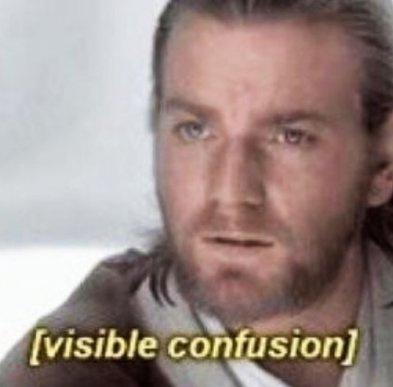

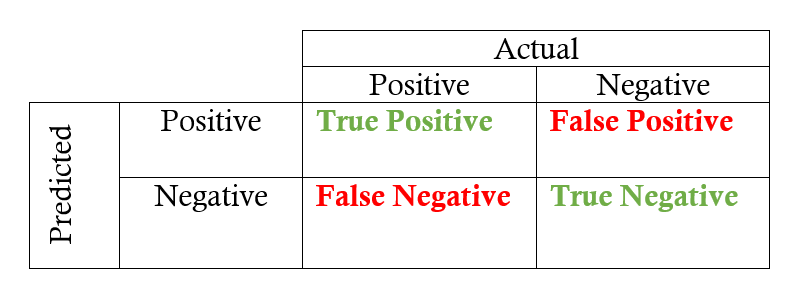


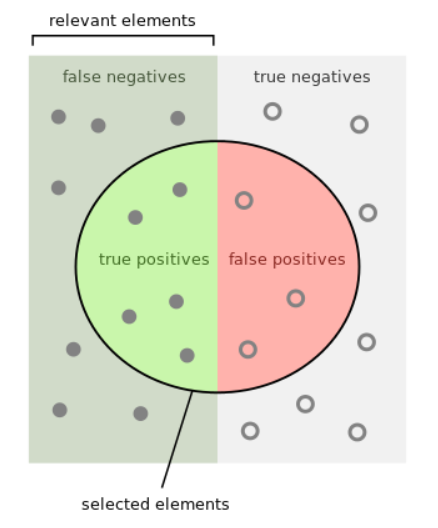

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[1148,    5],
       [ 174,    7]])

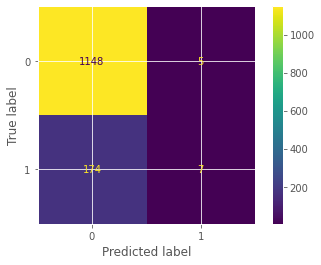

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test,values_format = '.0f')  
plt.show()

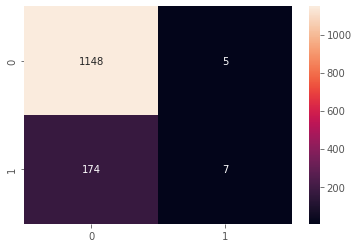

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='.0f')

### Exactitud

La exactitud es la métrica de clasificación por excelencia. Es bastante fácil de entender. Y se adapta fácilmente tanto a los problemas de clasificación binarios como a los multiclase.

La exactitud es la proporción de resultados verdaderos entre el número total de casos examinados. Su valor se encuentra entre 0 y 1.
$$ Exactitud = \frac{(TP+TN)}{(TP+FP+FN+TN)}$$

*¿Cuándo utilizarla?*

La exactitud es una opción válida de evaluación para los problemas de clasificación que están bien equilibrados y no están sesgados o no hay desequilibrio de clases.

*Advertencias*

Digamos que nuestra clase objetivo es muy escasa. ¿Queremos que la exactitud sea una métrica del rendimiento de nuestro modelo? ¿Y si estamos prediciendo si un asteroide va a chocar con la Tierra? Sólo hay que decir que no todo el tiempo. Y tendrás un 99% de exactitud. Mi modelo puede ser razonablemente preciso, pero no tiene ningún valor.


In [ ]:
from sklearn import metrics
print('Exactitud:', metrics.accuracy_score(y_test, y_pred))

Exactitud: 0.8658170914542729


### Precisión

Empecemos por la precisión, que responde a la siguiente pregunta: ¿qué proporción de los positivos predichos es realmente positiva?

La precisión es la proporción de resultados verdaderos entre el número total de casos examinados. El mejor valor es 1 y el peor es 0.

$$ Exactitud = \frac{(TP)}{(TP+FP)}$$

Si en el problema de predicción de asteroides, nunca predijimos un verdadero positivo, por lo tanto precisión = 0.

*¿Cuándo utilizarla?*

La precisión es una elección válida de la métrica de evaluación cuando queremos estar muy seguros de nuestra predicción. Por ejemplo: Si estamos construyendo un sistema para predecir si debemos reducir el límite de crédito de una cuenta concreta, queremos estar muy seguros de nuestra predicción o puede provocar la insatisfacción del cliente.

*Advertencias*

Ser muy preciso significa que nuestro modelo dejará sin tocar a muchos morosos y, por tanto, perderá dinero.

In [ ]:
print('Precisión:', metrics.precision_score(y_test, y_pred))

Precisión: 0.5833333333333334


### Recall (recuperación)

Otra medida muy útil es la recuperación, que responde a una pregunta diferente: ¿qué proporción de positivos reales se clasifica correctamente?

El recuerdo es, intuitivamente, la capacidad del clasificador para encontrar todas las muestras positivas. El mejor valor es 1 y el peor es 0.

$$ Recall = \frac{(TP)}{(TP+FN)}$$

En el problema de predicción de asteroides, nunca predijimos un verdadero positivo. Por tanto, el recall también es igual a 0.

*¿Cuándo utilizarla?*

La recuperación es una elección válida de la métrica de evaluación cuando queremos capturar el mayor número posible de positivos. Por ejemplo: Si estamos construyendo un sistema para predecir si una persona tiene cáncer o no, queremos capturar la enfermedad aunque no estemos muy seguros.

*Advertencias*

La recuperación es 1 si predecimos 1 para todos los ejemplos.

De ahí la idea de utilizar el equilibrio entre precisión y recall: la puntuación F1.

In [ ]:
print('Recall:', metrics.recall_score(y_test, y_pred))

Recall: 0.03867403314917127


### Puntuación $F_{1}$y  $F_{\beta}$

La puntuación F1 es un número entre 0 y 1 y es la media armónica de la precisión y la recuperación. Puede interpretarse como una media ponderada de la precisión y la recuperación, donde la puntuación F1 alcanza su mejor valor en 1 y la peor puntuación en 0. La contribución relativa de la precisión y la recuperación a la puntuación F1 son iguales. La fórmula de la puntuación F1 es:

$$ F_1 = 2 * \frac{(Precision * recall)}{(Precision + recall)}$$

Empecemos con un problema de predicción binaria. Estamos prediciendo si un asteroide chocará con la tierra o no.

Así que si decimos "No" para todo el conjunto de entrenamiento. Nuestra precisión aquí es 0. ¿Cuál es el recuerdo de nuestra clase positiva? Es cero. ¿Cuál es la exactitud? Es más del 99%.

Y por lo tanto la puntuación F1 es también 0. Y así llegamos a saber que el clasificador que tiene una precisión del 99% es básicamente inútil para nuestro caso. Y por lo tanto se resuelve nuestro problema.

*¿Cuándo utilizarlo?*

Queremos tener un modelo con buena precisión y recall.(¿Siempre?)

En pocas palabras, la puntuación F1 mantiene un equilibrio entre la precisión y la recuperación del clasificador. Si la precisión es baja, la F1 es baja y si la recuperación es baja, la puntuación F1 es baja.

*Advertencia*

El principal problema de la puntuación F1 es que da el mismo peso a la precisión y a la recuperación. A veces podemos necesitar incluir el conocimiento del dominio en nuestra evaluación cuando queremos tener más recall o más precisión.

Para solucionarlo, podemos hacerlo creando una métrica F1 ponderada como la que se muestra a continuación, en la que beta gestiona el compromiso entre la precisión y la recuperación.

$$ F_{\beta} = (1+\beta^2) * \frac{Precision * recall}{(\beta^2 * Precision) + recall}$$

Aquí damos $\beta$ veces más importancia al recall que a la precisión.





In [ ]:
print('F1 score:', metrics.f1_score(y_test, y_pred))

F1 score: 0.07253886010362694


In [ ]:
print('Fbeta score:', metrics.fbeta_score(y_test, y_pred, beta=1))

Fbeta score: 0.07253886010362694


In [ ]:
print('Fbeta score:', metrics.fbeta_score(y_test, y_pred, beta=0.5))

Fbeta score: 0.15283842794759828


In [ ]:
print('Fbeta score:', metrics.fbeta_score(y_test, y_pred, beta=1.5))

Fbeta score: 0.05426356589147287


### Log Loss/Binary Crossentropy

La pérdida logarítmica es una métrica de evaluación bastante buena para los clasificadores **binarios** y a veces también es el objetivo de optimización en el caso de la regresión logística y las redes neuronales.

La pérdida logarítmica binaria para un ejemplo viene dada por la siguiente fórmula, donde p es la probabilidad de predecir 1.

$$ L_{log}(y,p) = -(ylog(p)+(1-y)log(1-p))$$




In [ ]:
print('Log Loss:', metrics.log_loss(y_test, y_pred))

Log Loss: 4.634516471271486


Es difícil interpretar los valores brutos de pérdida logarítmica, pero sigue siendo una buena métrica para comparar modelos. Para cualquier problema dado, un valor de pérdida logarítmica más bajo significa mejores predicciones.


*¿Cuándo utilizarlo?*

Cuando la salida de un clasificador son las probabilidades de predicción. La pérdida logarítmica tiene en cuenta la incertidumbre de su predicción en función de cuánto varía de la etiqueta real. Esto nos da una visión más matizada del rendimiento de nuestro modelo. En general, minimizar la Pérdida Log da una mayor precisión al clasificador.

*Advertencias*

Es susceptible en caso de conjuntos de datos desequilibrados. Es posible que tenga que introducir pesos de clase para penalizar más los errores de las minorías o puede utilizarlo después de equilibrar el conjunto de datos.



### Curva característica del receptor (ROC) / puntuación del área bajo la curva (AUC)

La [curva ROC](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/) (Receiver Operator Characteristic) es una métrica de evaluación para problemas de clasificación binaria. Es una curva de probabilidad que traza el TPR contra el FPR en varios valores de umbral y esencialmente separa la "señal" del "ruido".  Esta curva genera básicamente dos métricas importantes: la sensibilidad y la especificidad.


#### Métrica de sensibilidad-especificidad

* La sensibilidad se refiere a la tasa de verdaderos positivos y resume lo bien que se predijo la clase positiva.

$$Sensibilidad = TP / (TP + FN)$$

* La especificidad es el complemento de la sensibilidad, o la tasa de verdaderos negativos, y resume lo bien que se predijo la clase negativa.

$$Especificidad = TN / (FP + TN)$$

Para una clasificación desequilibrada, la sensibilidad puede ser más interesante que la especificidad.



Hemos obtenido las probabilidades de nuestro clasificador. Podemos utilizar varios valores de umbral para trazar nuestra sensibilidad (TPR) y (1-especificidad) (FPR) en la cura y tendremos una curva ROC.

Donde la tasa de verdaderos positivos o TPR es simplemente la proporción de verdades que estamos capturando usando nuestro algoritmo.

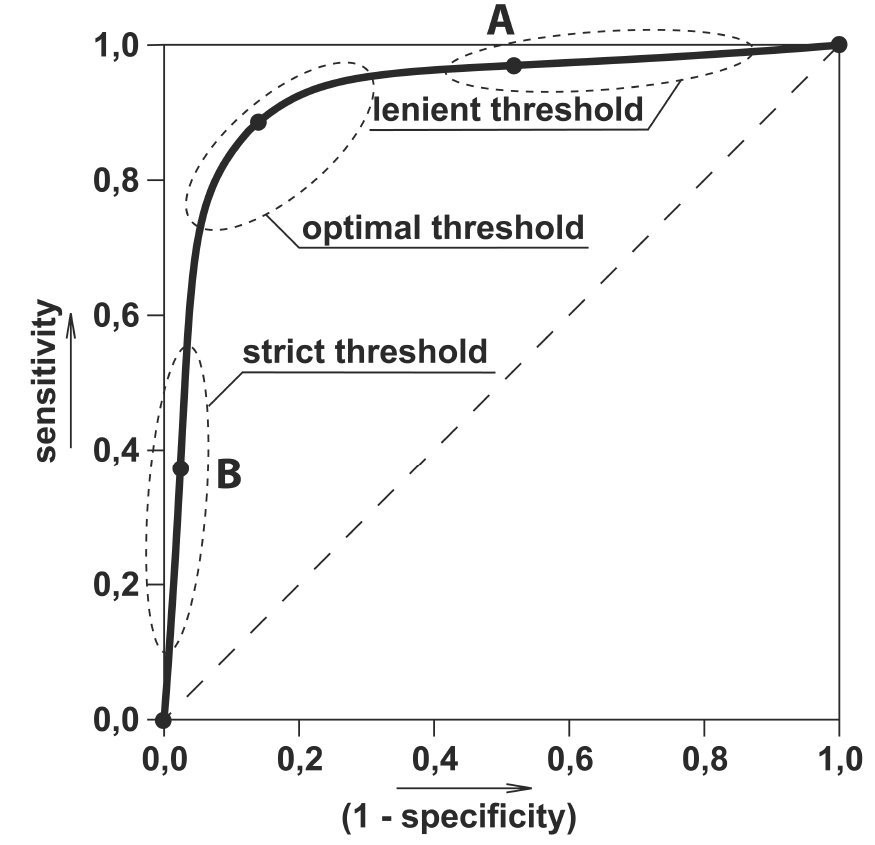

[Fuente imagen](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)




Aquí podemos utilizar las curvas ROC para decidir el valor del umbral.
La elección del valor del umbral también dependerá de cómo se vaya a utilizar el clasificador.

Si se trata de una aplicación de clasificación de cáncer, no querrá que su umbral sea tan grande como 0,5. Incluso si un paciente tiene una probabilidad de 0,3 de tener cáncer lo clasificarías en 1.

De la misma manera, en una aplicación para reducir los límites de la tarjeta de crédito, no querrás que tu umbral sea tan grande como 0,5. En este caso, le preocupa un poco el efecto negativo de la reducción de los límites en la satisfacción del cliente.


Cuanto más alto sea el AUC, mejor será el rendimiento del modelo a la hora de distinguir entre las clases positivas y negativas.

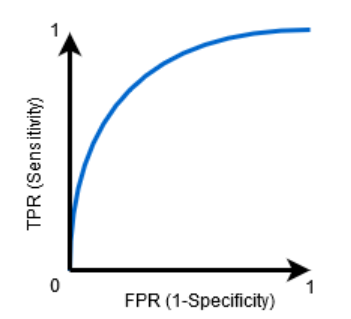


Cuando $0,5<AUC<1$, hay una alta probabilidad de que el clasificador sea capaz de distinguir los valores de clase positivos de los negativos. Esto es así porque el clasificador es capaz de detectar más números de verdaderos positivos y verdaderos negativos que de falsos negativos y falsos positivos.



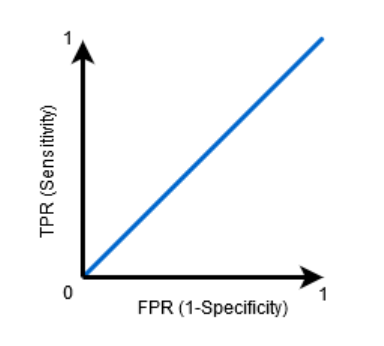

Cuando $AUC=0.5$ , el clasificador no es capaz de distinguir entre puntos de clase positiva y negativa. Esto significa que el clasificador predice una clase aleatoria o una clase constante para todos los puntos de datos.

**Por lo tanto, cuanto más alto sea el valor AUC de un clasificador, mejor será su capacidad para distinguir entre clases positivas y negativas.**

#### ¿Cómo funciona la curva AUC-ROC?

En una curva ROC, un valor más alto del eje X indica un mayor número de falsos positivos que de verdaderos negativos. Mientras que un valor más alto del eje Y indica un mayor número de Verdaderos positivos que de Falsos negativos. Así pues, la elección del umbral depende de la capacidad de equilibrio entre los falsos positivos y los falsos negativos.

Profundicemos un poco más y entendamos cómo sería nuestra curva ROC para diferentes valores de umbral y cómo variarían la especificidad y la sensibilidad.

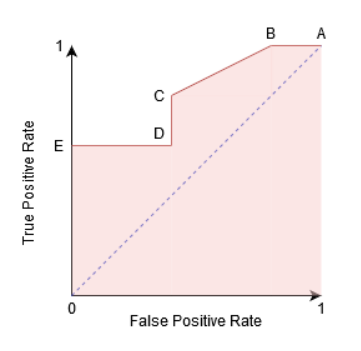

Podemos intentar comprender este gráfico generando una matriz de confusión para cada punto correspondiente a un umbral y hablar del rendimiento de nuestro clasificador:

**Punto A**
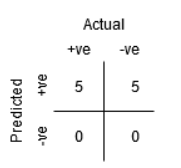

El punto A es donde la sensibilidad es la más alta y la especificidad la más baja. Esto significa que todos los puntos de la clase Positiva se clasifican correctamente y todos los puntos de la clase Negativa se clasifican incorrectamente.

De hecho, cualquier punto de la línea azul corresponde a una situación en la que la tasa de verdaderos positivos es igual a la tasa de falsos positivos.


*Todos los puntos por encima de esta línea corresponden a la situación en la que la proporción de puntos correctamente clasificados pertenecientes a la clase Positiva es mayor que la proporción de puntos incorrectamente clasificados pertenecientes a la clase Negativa.Todos los puntos por encima de esta línea corresponden a la situación en la que la proporción de puntos correctamente clasificados pertenecientes a la clase Positiva es mayor que la proporción de puntos incorrectamente clasificados pertenecientes a la clase Negativa.*


**Punto B**
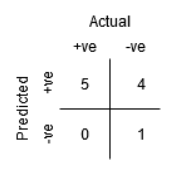

Aunque el punto B tiene la misma sensibilidad que el punto A, tiene una mayor especificidad. Esto significa que el número de puntos de clase incorrectamente negativos es menor en comparación con el umbral anterior. Esto indica que este umbral es mejor que el anterior.

**Punto C y Punto D**

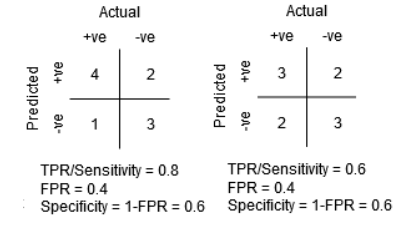



Entre los puntos C y D, la sensibilidad del punto C es mayor que la del punto D para la misma especificidad. Esto significa que, para el mismo número de puntos de clase negativa clasificados incorrectamente, el clasificador predijo un mayor número de puntos de clase positiva. Por lo tanto, el umbral en el punto C es mejor que el punto D. Aunque también, depende de cuántos puntos clasificados incorrectamente queremos tolerar para nuestro clasificador.

**"Las falsas esperanzas son más peligrosas que los miedos" -J.R.R. Tolkien**



In [ ]:
from IPython.display import Image
Image(url='https://c.tenor.com/q5CCFh5v6GAAAAAC/gandalf.gif')

**Punto E**
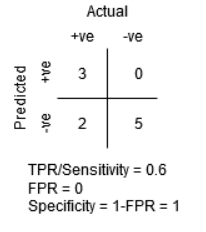

El punto E es donde la especificidad es más alta. Esto significa que no hay falsos positivos clasificados por el modelo. El modelo puede clasificar correctamente todos los puntos de clase negativa. Elegiríamos este punto si nuestro problema fuera dar recomendaciones perfectas de canciones a nuestros usuarios.

Siguiendo esta lógica, ¿puedes adivinar dónde se situaría en el gráfico el punto correspondiente a un clasificador perfecto?

*Sí, estaría en la esquina superior izquierda del gráfico ROC, correspondiente a la coordenada (0, 1) en el plano cartesiano. Es aquí donde tanto la sensibilidad como la especificidad serían máximas y el clasificador clasificaría correctamente todos los puntos de clase positiva y negativa.*

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score:', metrics.roc_auc_score(y_test, y_pred, average=None))

ROC AUC score: 0.5171687598529898


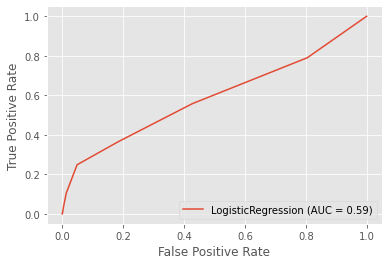

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test) 

*¿Cuándo utilizarlo?*

El AUC es invariable en cuanto a la escala. Mide lo bien que se clasifican las predicciones, en lugar de sus valores absolutos. Así que, por ejemplo, si usted, como vendedor, quiere encontrar una lista de usuarios que responderán a una campaña de marketing, el AUC es una buena métrica para utilizar, ya que las predicciones clasificadas por probabilidad es el orden en el que usted creará una lista de usuarios para enviar la campaña de marketing.

Otra ventaja de utilizar el AUC es que es invariante del umbral de clasificación, como la pérdida logarítmica. Mide la calidad de las predicciones del modelo independientemente del umbral de clasificación que se elija, a diferencia de la puntuación F1 o la precisión, que dependen de la elección del umbral.

*Advertencias*

A veces necesitaremos resultados probabilísticos bien calibrados de nuestros modelos y el AUC no ayuda a ello.



## Resumen

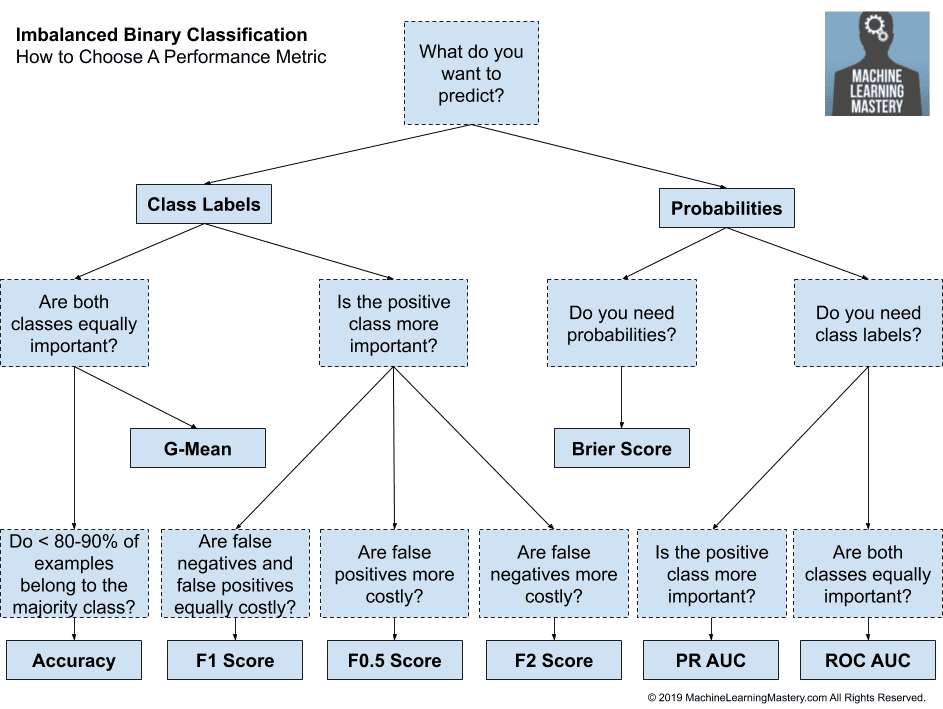

[Fuente  de la imagen](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)